In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("fraud.csv")

In [3]:
dataset

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0
3,1,PAYMENT,7817.71,53860.00,46042.29,0.00,0.00,0,0
4,1,PAYMENT,7107.77,183195.00,176087.23,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
16421,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,0
16422,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0
16423,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
16424,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16426 entries, 0 to 16425
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  object 
 2   amount          16426 non-null  float64
 3   oldbalanceOrg   16426 non-null  float64
 4   newbalanceOrig  16426 non-null  float64
 5   oldbalanceDest  16426 non-null  float64
 6   newbalanceDest  16426 non-null  float64
 7   isFraud         16426 non-null  int64  
 8   isFlaggedFraud  16426 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 1.1+ MB


In [7]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(dtype=np.int,sparse=True)
nominal = pd.DataFrame(onehot.fit_transform(dataset[['type']]).toarray(),columns=['PAYMENT','CASH_OUT','TRANSFER','CASH_IN','DEBIT'])
nominal

C:\Users\NITHIY~1\AppData\Local\Temp/ipykernel_22780/884311471.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  onehot = OneHotEncoder(dtype=np.int,sparse=True)


,PAYMENT,CASH_OUT,TRANSFER,CASH_IN,DEBIT
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
16421,0,1,0,0,0
16422,0,0,0,0,1
16423,0,1,0,0,0
16424,0,0,0,0,1


In [8]:
dataset = dataset.drop(['type'],axis=1)
dataset = dataset.drop(['step'],axis=1)
dataset

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,11668.14,41554.00,29885.86,0.00,0.00,0,0
3,7817.71,53860.00,46042.29,0.00,0.00,0,0
4,7107.77,183195.00,176087.23,0.00,0.00,0,0
...,...,...,...,...,...,...,...
16421,339682.13,339682.13,0.00,0.00,339682.13,1,0
16422,6311409.28,6311409.28,0.00,0.00,0.00,1,0
16423,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
16424,850002.52,850002.52,0.00,0.00,0.00,1,0


In [9]:
dataset.loc[:,'PAYMENT'] = nominal['PAYMENT']
dataset.loc[:,'CASH_OUT'] = nominal['CASH_OUT']
dataset.loc[:,'TRANSFER'] = nominal['TRANSFER']
dataset.loc[:,'CASH_IN'] = nominal['CASH_IN']
dataset.loc[:,'DEBIT'] = nominal['DEBIT']
dataset

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,PAYMENT,CASH_OUT,TRANSFER,CASH_IN,DEBIT
0,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,0,0,1,0
1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,0,0,1,0
2,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,0,0,1,0
3,7817.71,53860.00,46042.29,0.00,0.00,0,0,0,0,0,1,0
4,7107.77,183195.00,176087.23,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16421,339682.13,339682.13,0.00,0.00,339682.13,1,0,0,1,0,0,0
16422,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0,0,0,0,1
16423,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,0,1,0,0,0
16424,850002.52,850002.52,0.00,0.00,0.00,1,0,0,0,0,0,1


In [10]:
b=dataset['isFraud']
dataset=dataset.drop(['isFraud'],axis=1)
dataset.loc[:,'isFraud']=b
dataset

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,PAYMENT,CASH_OUT,TRANSFER,CASH_IN,DEBIT,isFraud
0,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,0,1,0,0
1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,0,1,0,0
2,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,0,1,0,0
3,7817.71,53860.00,46042.29,0.00,0.00,0,0,0,0,1,0,0
4,7107.77,183195.00,176087.23,0.00,0.00,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16421,339682.13,339682.13,0.00,0.00,339682.13,0,0,1,0,0,0,1
16422,6311409.28,6311409.28,0.00,0.00,0.00,0,0,0,0,0,1,1
16423,6311409.28,6311409.28,0.00,68488.84,6379898.11,0,0,1,0,0,0,1
16424,850002.52,850002.52,0.00,0.00,0.00,0,0,0,0,0,1,1


In [11]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
16421    1
16422    1
16423    1
16424    1
16425    1
Name: isFraud, Length: 16426, dtype: int64


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [13]:
from sklearn.linear_model import LogisticRegression
f1=LogisticRegression()
f1.fit(x_train,y_train)
y_pred=f1.predict(x_test)
from sklearn.metrics import accuracy_score
acc_log=accuracy_score(y_pred,y_test)*100
print("accuracy:",acc_log)

accuracy: 80.37496956415875


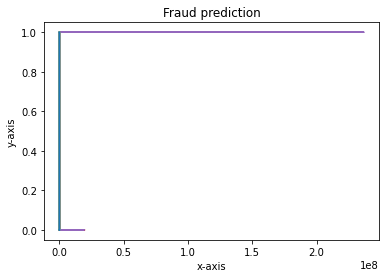

In [14]:
plt.plot(x, y)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Fraud prediction')
plt.show()